In [1]:
!python -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
import tensorflow as tf

In [71]:
from tensorflow.keras import Sequential

In [73]:
from tensorflow.keras.layers import Dense, Input

In [5]:
import pandas as pd

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
from sklearn.model_selection import train_test_split

In [167]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../../../dados/nlp/imdb-reviews-pt-br.csv", encoding="utf-8") 
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [17]:
df['output'] = df["sentiment"].replace(to_replace=['neg', 'pos'], value=[0, 1], inplace = False)

C:\Users\anton\AppData\Local\Temp\ipykernel_37492\2661963301.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['output'] = df["sentiment"].replace(to_replace=['neg', 'pos'], value=[0, 1], inplace = False)


In [19]:
df

,id,text_en,text_pt,sentiment,output
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [21]:
# cada palavra como um numero
dicionario_teste = {"Como": 1, "a": 2, "média": 3, "de": 4, "votos": 5, "era": 6 } 

# Cada palavra como Vetor
dicionario_teste = {
              "Como": [1, 0, 0, 0, 0, 0], 
              "a": [0, 1, 0, 0, 0, 0], 
              "média": [0, 0, 1, 0, 0, 0], 
              "de":  [0, 0, 0, 1, 0, 0], 
              "votos":  [0, 0, 0, 0, 1, 0], 
              "era":  [0, 0, 0, 0, 0, 1] 
             }


In [77]:
MAX_FEATURES = 500

In [59]:
vetorizador = CountVectorizer(binary=True, max_features = MAX_FEATURES)

In [61]:
texts_vectors = vetorizador.fit_transform( df["text_pt"] )

In [62]:
vocabulario = vetorizador.get_feature_names_out()

In [95]:
X = pd.DataFrame.sparse.from_spmatrix( texts_vectors, columns=vocabulario ).astype(float)

In [115]:
# X_TRAIN = X[0:35000]
# Y_TRAIN = df["output"][0: 35000]
# X_TEST = X[35000:]
# Y_TEST = df["output"][35000:]

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df["output"], random_state = 150, train_size=0.7)

In [157]:
modelo = Sequential()
modelo.add( Input( (MAX_FEATURES, ) ) ) 
modelo.add( Dense( 128, activation="relu" ) )
modelo.add( Dense( 32, activation="relu" ) )
modelo.add( Dense( 1, activation="sigmoid" ) )
modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,289 (266.75 KB)

 Trainable params: 68,289 (266.75 KB)

 Non-trainable params: 0 (0.00 B)

In [159]:
modelo.compile( optimizer="SGD", loss="binary_crossentropy", metrics=["accuracy"])

In [161]:
historico = modelo.fit( X_train, Y_train, epochs=20 )

Epoch 1/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5976 - loss: 0.6541
Epoch 2/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7836 - loss: 0.4606
Epoch 3/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8098 - loss: 0.4155
Epoch 4/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8186 - loss: 0.3990
Epoch 5/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8242 - loss: 0.3935
Epoch 6/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8229 - loss: 0.3920
Epoch 7/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8247 - loss: 0.3947
Epoch 8/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8273 - loss: 0.3874
Epoch 9/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8286 - loss: 0.3816
Epoch 10/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8273 - loss: 0.3838
Epoch 11/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8283 - loss: 0.3798
Epoch 12/20
1082/1082 ━━━━━━━━

In [165]:
modelo.evaluate(X_test, Y_test)

464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8199 - loss: 0.4077


[0.4046175181865692, 0.8207979798316956]

In [169]:
historico.history

{'accuracy': [0.6744750142097473,
  0.7928135991096497,
  0.8131480813026428,
  0.8192426562309265,
  0.8219000101089478,
  0.8233730792999268,
  0.8250194787979126,
  0.8254238963127136,
  0.8261170983314514,
  0.8278212547302246,
  0.829207718372345,
  0.832182765007019,
  0.8333958983421326,
  0.8343780040740967,
  0.8366309404373169,
  0.838681697845459,
  0.8409924507141113,
  0.843360960483551,
  0.8483290672302246,
  0.8515062928199768],
 'loss': [0.5953415036201477,
  0.4457133710384369,
  0.41131648421287537,
  0.40090107917785645,
  0.39684849977493286,
  0.3929392695426941,
  0.39035895466804504,
  0.3879973292350769,
  0.38564935326576233,
  0.38237860798835754,
  0.37925654649734497,
  0.37635189294815063,
  0.37252405285835266,
  0.368852823972702,
  0.36509430408477783,
  0.36079081892967224,
  0.3560338318347931,
  0.351400226354599,
  0.3455662131309509,
  0.33925336599349976]}

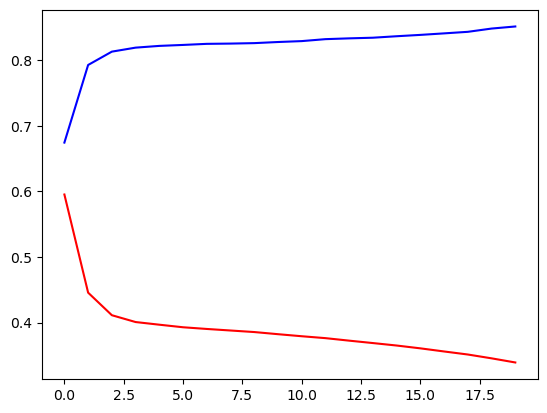

In [177]:
plt.plot(historico.history['accuracy'], color="blue")
plt.plot(historico.history['loss'], color="red")
plt.show()

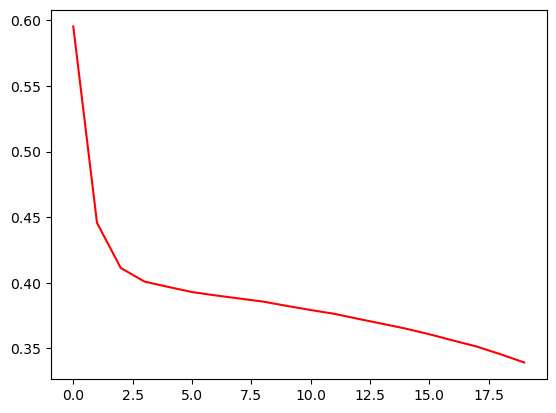

In [175]:
plt.plot(historico.history['loss'], color="red")

In [215]:
texto = "droga de filme gastei meu dinheiro no cinema"

In [217]:
vectorizer_predict = CountVectorizer( max_features = MAX_FEATURES, vocabulary=vocabulario, binary=True)

In [219]:
texto_vetorizado = vectorizer_predict.fit_transform( [texto] )

In [221]:
texto_vetorizado

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [223]:
texto_vetorizado_sparse = pd.DataFrame.sparse.from_spmatrix( texto_vetorizado, columns=vocabulario).astype(float)

In [225]:
texto_vetorizado_sparse

,10,absolutamente,achei,acho,acima,acontece,acreditar,agora,agradável,ainda,...,vão,vê,vídeo,às,época,ótima,ótimo,último,única,único
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
valor = modelo.predict( [texto_vetorizado_sparse] )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [229]:
"positivo" if round(valor[0][0]) == 1 else "negativo"

'negativo'